In [48]:
import os
import numpy as np
import matplotlib
import torch
#matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import csv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split,TensorDataset
from torchvision import transforms, utils
import time
import pandas as pd
import scipy.io
import sklearn.metrics
import seaborn as sns
import random

random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Writing custom dataset
class AI_Image_dataset(Dataset):
    def __init__(self, file_name):
        data = scipy.io.loadmat(file_name)
        self.X = data['data'][0, 0]['featVec']


        # Only use with object features
      
        self.Y = data['data'][0, 0]['labelVec']


    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return (self.Y[idx],self.X[idx])

#Network definition
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        n_CW = 50 # This directly affects accuracy if value is low.
        oc = 3
        self.conv1 = nn.Conv1d(4,n_CW,kernel_size=100, stride=20, padding=49)   
        self.conv2 = nn.Conv1d(n_CW,int(n_CW/2) , kernel_size=50, stride=10, padding=31)
        self.conv3 = nn.Conv1d(int(n_CW/2),oc,kernel_size=16, stride=10, padding=0)
        self.maxPool1 = nn.MaxPool1d(kernel_size=5,stride=1,padding=2)
        self.avgPool1 = nn.AvgPool1d(kernel_size=5)       
        self.drop1 = nn.Dropout(p=0.2)
        self.BN1 = nn.BatchNorm1d(n_CW)
        self.BN2 = nn.BatchNorm1d(int(n_CW/2))
        self.ln = nn.Linear(7, 1)
        
    def forward(self, x):
        x = (F.relu(self.conv1(x)))
        # print(x.shape)
        x = self.BN1(x)

        x = (F.relu(self.conv2(x)))
        x = self.BN2(x)
        # print(x.shape)
        x = (F.relu(self.conv3(x)))
        # print(x.shape)
        x = self.ln(x)
        # x = self.drop1(x)
        # print(x.shape)

        x = x.view(x.shape[0],-1)              
        return x

#Network definition


In [54]:
from sklearn.model_selection import train_test_split
file_name_train=r"/content/drive/My Drive/Colab Notebooks/data_train40.mat"
file_name_test=r"/content/drive/My Drive/Colab Notebooks/data_test25.mat"

data = scipy.io.loadmat(file_name_train)
X_train = data['data'][0, 0]['featVec']
y_train = data['data'][0, 0]['labelVec']

data = scipy.io.loadmat(file_name_test)
X_test = data['data'][0, 0]['featVec']
y_test = data['data'][0, 0]['labelVec']


X = np.vstack((X_train, X_test))
y = np.vstack((y_train, y_test))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
# trainset = AI_Image_dataset(file_name_train)
# testset = AI_Image_dataset(file_name_test)
print(X_train.shape)
# print(X_val.shape)
print(X_test.shape)


(58, 4, 16320)
(7, 4, 16320)


40
tensor(483939.1562, grad_fn=<AddBackward0>)
tensor(454139.1875, grad_fn=<AddBackward0>)
tensor(391864.4062, grad_fn=<AddBackward0>)
tensor(306949.4062, grad_fn=<AddBackward0>)
tensor(187042.1250, grad_fn=<AddBackward0>)
tensor(92992.6094, grad_fn=<AddBackward0>)
tensor(38258.2852, grad_fn=<AddBackward0>)
tensor(25561.5312, grad_fn=<AddBackward0>)
tensor(22617.3477, grad_fn=<AddBackward0>)
tensor(19715.1895, grad_fn=<AddBackward0>)
tensor(15917.8193, grad_fn=<AddBackward0>)
tensor(11961.0469, grad_fn=<AddBackward0>)
tensor(9818.1826, grad_fn=<AddBackward0>)
tensor(6597.3833, grad_fn=<AddBackward0>)
tensor(4821.8994, grad_fn=<AddBackward0>)
tensor(3299.5684, grad_fn=<AddBackward0>)
tensor(2636.7168, grad_fn=<AddBackward0>)
tensor(1671.8197, grad_fn=<AddBackward0>)
tensor(959.6469, grad_fn=<AddBackward0>)
tensor(734.8060, grad_fn=<AddBackward0>)
tensor(563.1517, grad_fn=<AddBackward0>)
tensor(963.4946, grad_fn=<AddBackward0>)
tensor(755.6703, grad_fn=<AddBackward0>)
tensor(531.1697, gr

<Figure size 432x288 with 0 Axes>

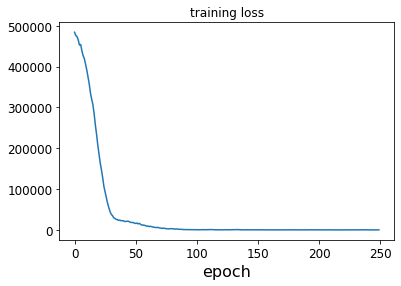

pred:  tensor([[106.2480,  88.9629, 125.4650]], grad_fn=<ViewBackward>)
real:  tensor([[105.,  90., 128.]])
pred:  tensor([[78.3863, 59.5820, 81.0007]], grad_fn=<ViewBackward>)
real:  tensor([[57., 73., 80.]])
pred:  tensor([[125.8534,  90.8116, 107.7836]], grad_fn=<ViewBackward>)
real:  tensor([[139., 103.,  85.]])
pred:  tensor([[ 96.6074,  92.7826, 102.6281]], grad_fn=<ViewBackward>)
real:  tensor([[ 93.,  99., 105.]])
pred:  tensor([[ 59.2312, 115.2861,  65.2345]], grad_fn=<ViewBackward>)
real:  tensor([[ 64., 149.,  66.]])
pred:  tensor([[87.8880, 79.9055, 99.1396]], grad_fn=<ViewBackward>)
real:  tensor([[ 74.,  85., 101.]])
pred:  tensor([[ 84.7319,  98.5484, 148.7518]], grad_fn=<ViewBackward>)
real:  tensor([[ 82., 104., 144.]])
0.8834344055503607
0.8978443630039692
0.9448626109265855
8.682452610560826
11.017266954694476
5.152692522321429


In [55]:

if __name__ == '__main__':
    
    
    print(len(trainset))
    #print(dataset[100])
    #print(dataset[122:124])

    #totaldata_loader = DataLoader(dataset, batch_size=len(trainset), shuffle=True)
    #print(next(iter(dataloader)))
    batchsize_train = 16

    train_loader = DataLoader(TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)), batch_size=batchsize_train,shuffle=True)
    batchsize_test = 1
    test_loader = DataLoader(TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test)), batch_size=batchsize_test, shuffle=False)
            
    
    #hyperparameter definition    
    learning_rate = 0.001    #学习的速率 越小越精细
    momentum = 0.1
    random_seed=1
    torch.backends.cudnn.enabled = False
    torch.manual_seed(random_seed)     #设定随机数种子为固定值
    
    train_loss_epoch = []
    test_acc_epoch =[]
    total_acc_epoch = []
    #epoch_range = np.arange(25,225,25)
    epoch_range = np.array([150])
    for EPOCHS in epoch_range:
    
        network = Net()
        
        #training
        optimizer = optim.Adam(network.parameters(), lr=learning_rate)
        # optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.9)
        
        plt.figure()
        
        #network.train()
        Training_Loss = []
        start_time = time.time()
        for epoch in range(250):
            train_loss = 0
            for X, Y in train_loader:
                X = X.view(-1,X.shape[1],X.shape[2])
                Y = Y.view(-1,Y.shape[1])
                X = X.float()
                Y = Y.float()          
                current_batchsize = X.shape[0]
                optimizer.zero_grad()
                output = network(X)
                loss = F.mse_loss(output[:, 0],Y[:, 0], reduction='sum') + F.mse_loss(output[:, 1],Y[:, 1], reduction='sum') + F.mse_loss(output[:, 2],Y[:, 2], reduction='sum')
                train_loss = train_loss + (loss*current_batchsize/len(train_loader.dataset))
                loss.backward()                     #calculate the gradient decent
                optimizer.step()                    #update the weight
            Training_Loss.append(train_loss)
            if epoch%5==0:
                print(train_loss)
                # plt.clf()
                # symbol = output.detach()
                # symbol =  symbol.max(dim=1).indices
                # plt.plot(Y[0], 'bo')
                # plt.plot(symbol[0], 'rx')
                # plt.title('epoch %i: training loss is ' %epoch + '%f'%loss)
                # plt.show()
                # plt.pause(0.5)
        
        train_loss_epoch.append(Training_Loss[-1].data.numpy())
        training_time=time.time()-start_time
        print('total training time is',training_time)
        
        plt.figure()
        plt.plot(Training_Loss)
        plt.title("training loss")
        plt.xlabel("epoch")
        plt.show()
        
        #evaluation
        network.eval()

        correct = []
        test_loss = 0
        accuracy = np.zeros((X_test.shape[0],3))
        err= np.zeros((X_test.shape[0],3))
        
        Y1_total=[]
        output1_total=[]
        Y2_total=[]
        output2_total=[]
        Y3_total=[]
        output3_total=[]
    
        for i, data_ in enumerate(test_loader):
           X = data_[0]
           Y = data_[1]
           X = X.view(-1,X.shape[1],X.shape[2])
           # X = X.view(-1,1,X.shape[1])
           Y = Y.view(-1,Y.shape[1])
           X = X.float()
           Y = Y.float()      
           current_batchsize = X.shape[0]
           output = network(X)
           test_loss = test_loss + ((F.mse_loss(output[:, 0],Y[:, 0]) + F.mse_loss(output[:, 1],Y[:, 1])) * current_batchsize/len(test_loader.dataset))
           print("pred: ", output)
           print("real: ", Y)
           Y1_total.append(Y[0,0].detach().numpy())
           Y2_total.append(Y[0,1].detach().numpy())
           Y3_total.append(Y[0,2].detach().numpy())
           output1_total.append(output[0,0].detach().numpy())
           output2_total.append(output[0,1].detach().numpy())
           output3_total.append(output[0,2].detach().numpy())

           accuracy[i,0]=(1-abs(output[0,0].detach().numpy()-Y[0,0].detach().numpy())/Y[0,0].detach().numpy())
           accuracy[i,1]=(1-abs(output[0,1].detach().numpy()-Y[0,1].detach().numpy())/Y[0,1].detach().numpy())
           accuracy[i,2]=(1-abs(output[0,2].detach().numpy()-Y[0,2].detach().numpy())/Y[0,2].detach().numpy())
           err[i,0]=abs(output[0,0].detach().numpy()-Y[0,0].detach().numpy())
           err[i,1]=abs(output[0,1].detach().numpy()-Y[0,1].detach().numpy())
           err[i,2]=abs(output[0,2].detach().numpy()-Y[0,2].detach().numpy())

        print(accuracy[:,0].mean())
        print(accuracy[:,1].mean())
        print(accuracy[:,2].mean())
        print(err[:,0].mean())
        print(err[:,1].mean())
        print(err[:,2].mean())

           
        # correct = [ item for sublist in correct for item in sublist]   
        # correct = np.asarray(correct)  
        # correct = correct.reshape(-1)
        # accuracy = correct.sum()/len(test_loader.dataset)
            
        # print('test_lost is',(test_loss/(len(test_loader.dataset)/batchsize_test)))
        # print('accuracy is: ',accuracy)
        # test_acc_epoch.append(accuracy)

    # plt.figure()
    # plt.plot(epoch_range,train_loss_epoch,'b')
    # plt.plot(epoch_range,test_acc_epoch,'r')
    # plt.show()
    
    # y = Y.data.numpy()
    # y_pred = symbol.data.numpy()
    # a = np.concatenate((y,y_pred),axis=1)
    

    

   
    

        

    



# New Section

In [ ]:
       # -----------------------------------------------------------------------
    # Checking results for entire dataset
   
     correct2 = []
    totaldata_loss = 0
    
    for Y, X in totaldata_loader:
       X = X.view(-1,X.shape[1],X.shape[2])
       # X = X.view(-1,1,X.shape[1])
       Y = Y.view(-1,Y.shape[1])
       X = X.float()
       Y = Y.long()      
       current_batchsize = X.shape[0]
       output = network(X)
       totaldata_loss = totaldata_loss + (F.cross_entropy(output,Y) * current_batchsize/len(totaldata_loader.dataset))
       symbol = output.detach()
       symbol = symbol.max(dim=1).indices
       correct2.append(Y.eq(symbol).numpy())
    correct2 = [ item for sublist in correct2 for item in sublist]   
    correct2 = np.asarray(correct2)  
    correct2 = correct2.reshape(-1)
    accuracy2 = correct2.sum()/len(totaldata_loader.dataset)

    print('total data loss is',(totaldata_loss/(len(totaldata_loader.dataset)/batchsize_test)))
    print('total data accuracy is: ',accuracy2)

    y_totaldata = Y.data.numpy()
    y_pred_totaldata = symbol.data.numpy()
    a2 = np.concatenate((y_totaldata,y_pred_totaldata),axis=1)

In [ ]:
Y1_total=np.array(Y1_total)
Y2_total=np.array(Y2_total)
output1_total=np.array(output1_total)
output2_total=np.array(output2_total)
print(Y1_total)
print(Y2_total)
print(output1_total)
print(output2_total)

[ 65.  65.  65.  65.  65.  85.  85.  85.  85.  85. 105. 105. 105. 105.
 105. 125. 125. 125. 125. 125. 145. 145. 145. 145. 145.]
[ 65.  85. 105. 125. 145.  65.  85. 105. 125. 145.  65.  85. 105. 125.
 145.  65.  85. 105. 125. 145.  65.  85. 105. 125. 145.]
[ 53.841114  52.071754  47.870407  52.36562   51.531425  70.01512
  67.10875   66.00339   65.14394   67.12863   87.27043   85.95372
  81.92854   82.42844   81.43485   99.76007   99.834526  98.67417
 100.422485 106.88982  116.41123  119.20973  117.18949  115.820076
 113.92847 ]
[ 51.959366  68.9451    82.486725 101.43683  118.47867   50.448555
  65.18638   86.846596 100.109985 119.50398   47.63789   68.00266
  82.11426   98.57237  117.962234  51.69167   66.76235   83.4523
  99.30589  116.16394   52.11166   67.15497   81.51921  104.593445
 116.005486]
